**Challenge 1**

In [70]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# generate y using following variables
B0 = 0.5
B1 = 1
x = np.linspace(10, 50, 100)
eps = np.random.normal(0, 0.1, 100)

y = B0 + B1 * np.log(x) + eps

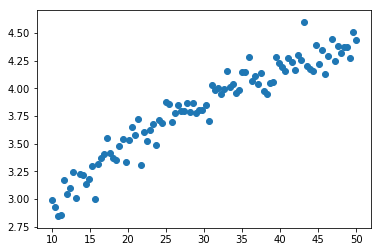

In [72]:
plt.scatter(x, y);

In [73]:
## import PolynomialFeatures and make_pipeline for Polynomial Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## quadratic fit
degree = 2
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
y = pd.DataFrame(y)
x = pd.DataFrame(x)
est.fit(x, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

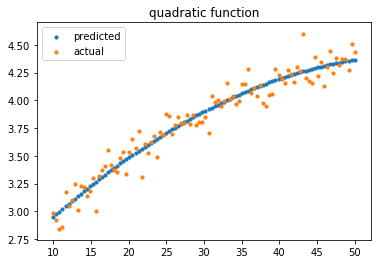

In [78]:
plt.scatter(x, est.predict(x), s=10);
plt.scatter(x, y, s=10);
plt.legend(['predicted', 'actual']);
plt.title('quadratic function');

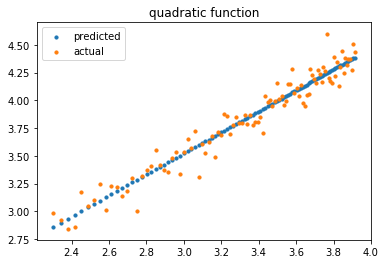

In [80]:
## logarithmic fit
degree = 1
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
est.fit(np.log(x), y)

plt.scatter(np.log(x), est.predict(np.log(x)), s=10);
plt.scatter(np.log(x), y, s=10);
plt.legend(['predicted', 'actual']);
plt.title('quadratic function');

**Challenge 2**

In [111]:
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# generate y using following variables
B0 = 0.5
B1 = 1
B2 = 2
x = np.linspace(10, 50, 100)
eps = np.random.normal(0, 0.1, 100)

y = B0 + B1 * x + B2 * (np.power(x, 2)) + eps

In [117]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)
n = len(x)
x_train = x.loc[:3/4*n]
x_test = x.loc[3/4*n:]
y_train = y.loc[:3/4*n]
y_test = y.loc[3/4*n:]

est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
est.fit(x_train, y_train)
# mse for the train set: 19739.886621806127
mean_squared_error(y_train, est.predict(x_train))
# mse for the test set: 489927.51708041219
mean_squared_error(y_test, est.predict(x_test))

489927.51708041219

**Challenge 3**

In [164]:
## store results
training_error = []
test_error = []
R_squared = []
AIC = []

def calculateRSS(residuals):
    return sum([r**2 for r in residuals[0]])
    
for degree in list(range(0, 8)):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(x_train, y_train)
    training_error.append(mean_squared_error(y_train, est.predict(x_train)))
    test_error.append(mean_squared_error(y_test, est.predict(x_test)))
    R_squared.append(est.score(x_test, y_test))
    AIC.append(calculateRSS(y_test-est.predict(x_test)))


In [173]:
R_squared

[-25.863196782701415,
 -0.74853241145792571,
 0.99999997401710294,
 0.99999996471642072,
 0.99999953603051328,
 0.99999082637414405,
 0.99997766202620975,
 0.99956449314224405]

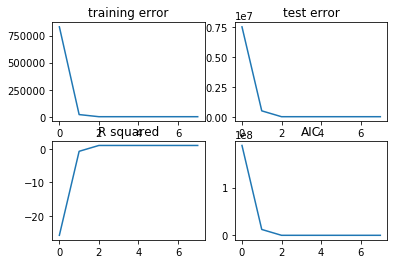

In [174]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(list(range(0, 8)), training_error);
axes[0, 0].set_title('training error');
axes[0, 1].plot(list(range(0, 8)), test_error);
axes[0, 1].set_title('test error');
axes[1, 0].plot(list(range(0, 8)), R_squared);
axes[1, 0].set_title('R squared');
axes[1, 1].plot(list(range(0, 8)), AIC);
axes[1, 1].set_title('AIC');

**Challenge 4**

In [191]:
training_error = []
test_error = []

for m in range(5, n, 5):
    x_train = x.loc[:m]
    x_test = x.loc[m:]
    y_train = y.loc[:m]
    y_test = y.loc[m:]
    
    est = make_pipeline(PolynomialFeatures(3), LinearRegression())
    est.fit(x_train, y_train)
    
    training_error.append(mean_squared_error(y_train, est.predict(x_train)))
    test_error.append(mean_squared_error(y_test, est.predict(x_test)))

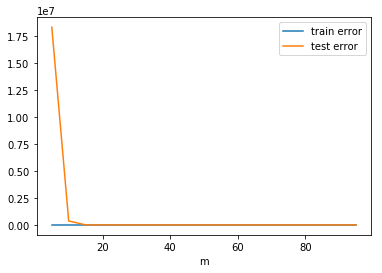

In [194]:
plt.plot(list(range(5, n, 5)), training_error);
plt.plot(list(range(5, n, 5)), test_error);
plt.xlabel('m');
plt.legend(['train error', 'test error']);

In [175]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)
n = len(x)
x_train = x.loc[:3/4*n]
x_test = x.loc[3/4*n:]
y_train = y.loc[:3/4*n]
y_test = y.loc[3/4*n:]